In [1]:
# Question 18
library('igraph')
circles <- dir('gplus', pattern = 'circles')
count <- 0
total <- 0
for (i in 1:length(circles)){
    circlesFile <- paste('gplus/', circles[i], sep = '')
    FileName <- file(circlesFile, open = 'r')
    lines <- readLines(FileName)
    if (length(lines)>2){
        count <- count + 1
    }
    total <- total + 1
}
print(paste('number of personal networks', total))
print(paste('number of personal networks for users who have more than 2 circles', count))


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "number of personal networks 132"
[1] "number of personal networks for users who have more than 2 circles 57"


[1] "109327480479767108490"


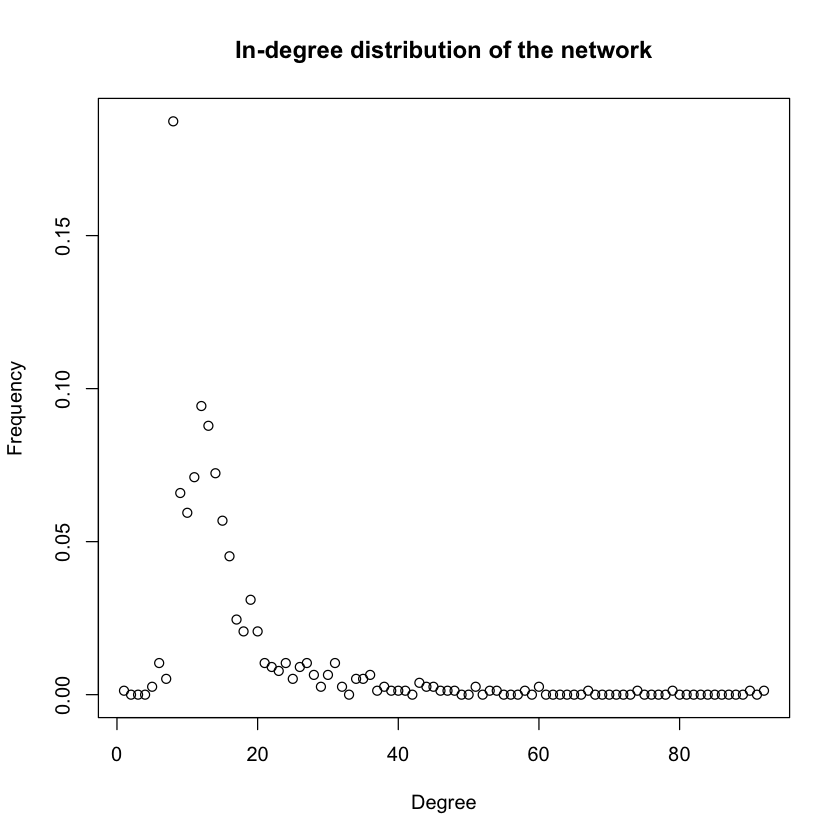

[1] "115625564993990145546"


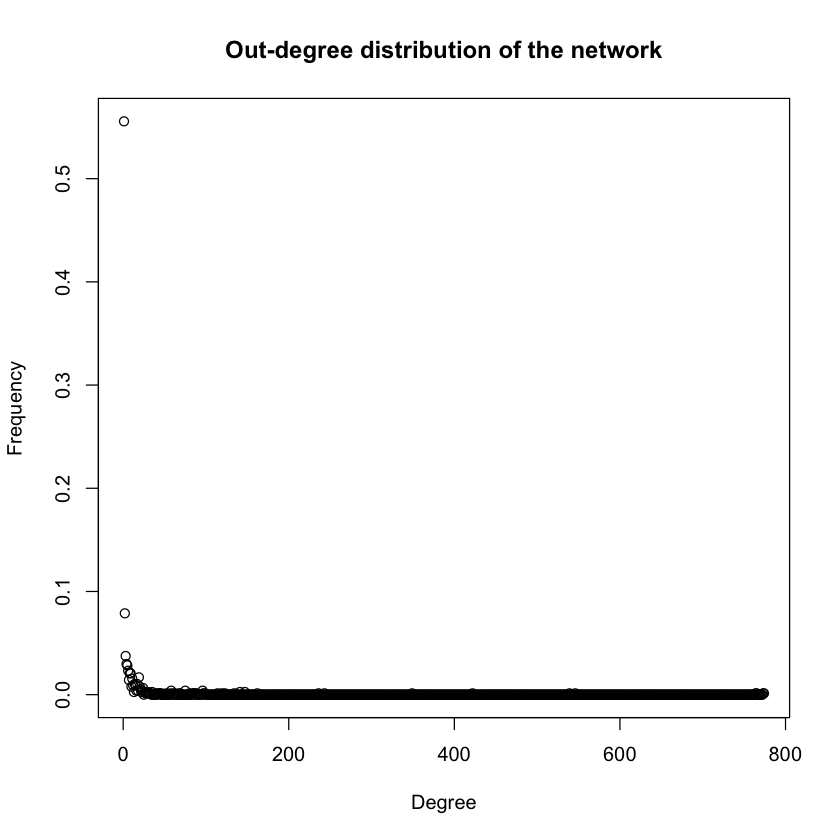

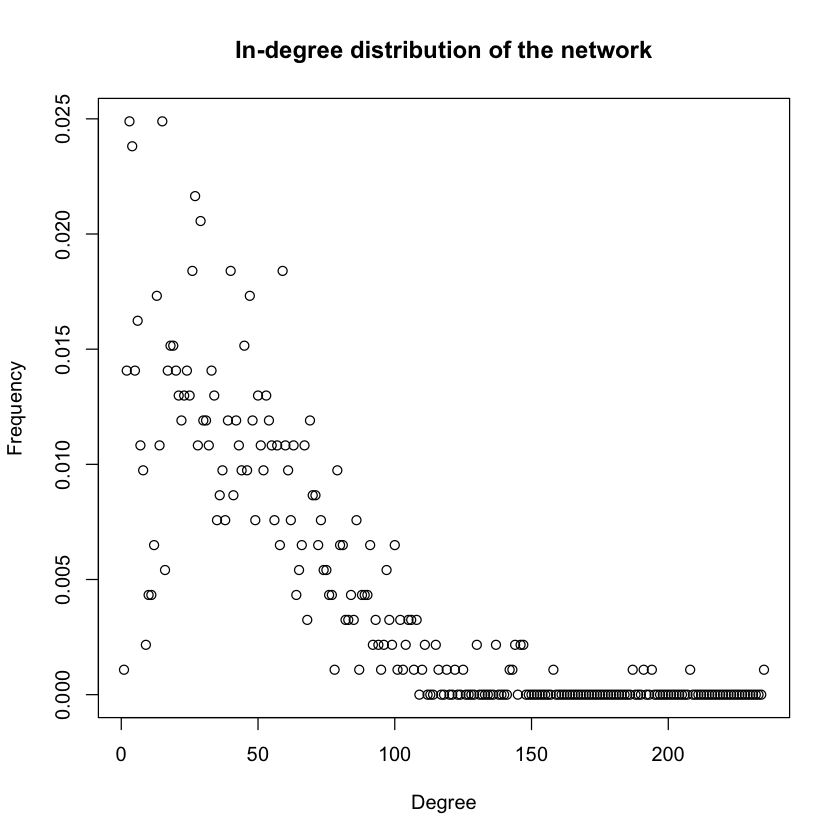

[1] "101373961279443806744"


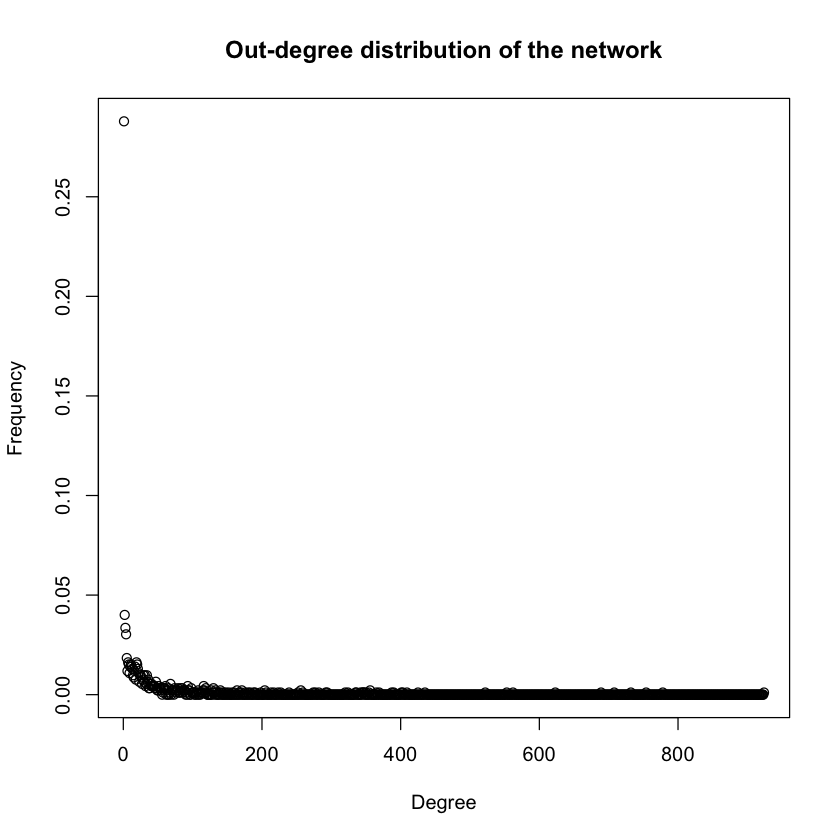

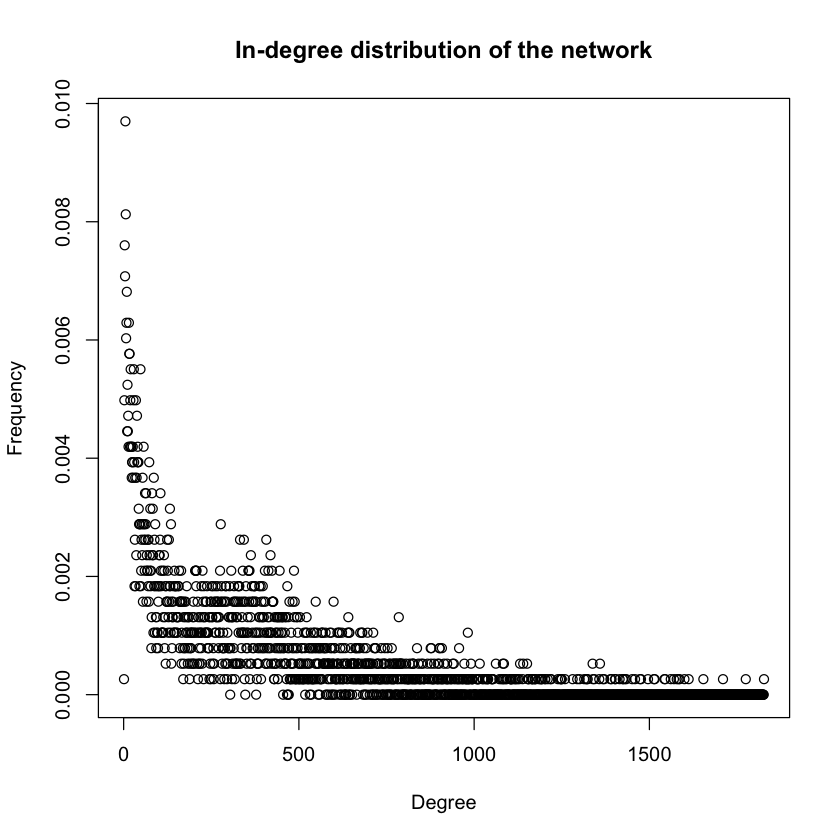

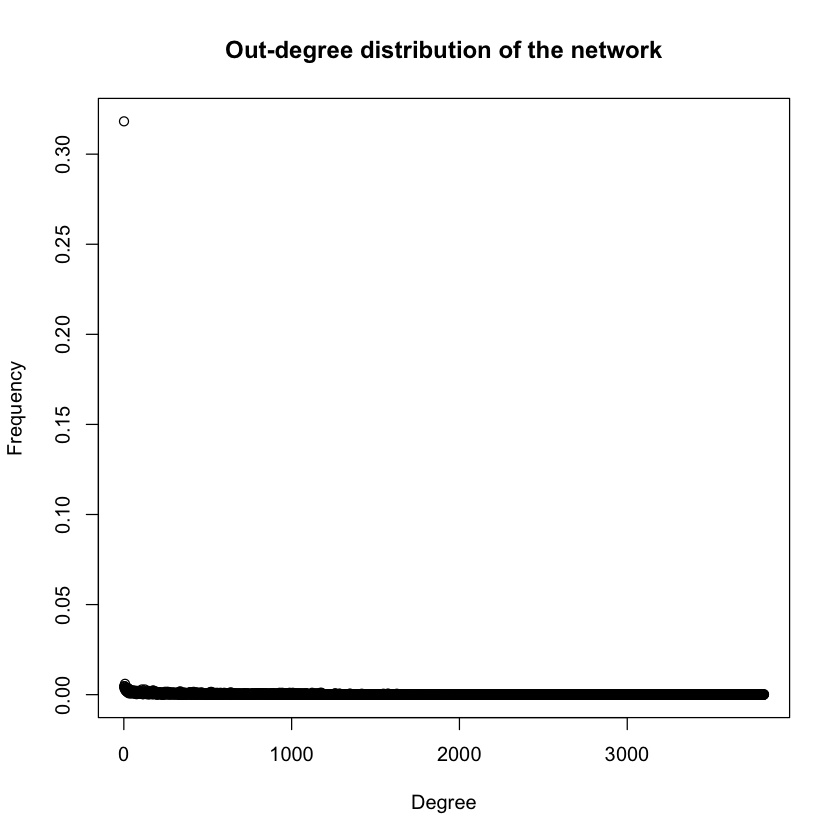

In [48]:
# Question 19
id <- c('109327480479767108490', '115625564993990145546', '101373961279443806744')

plot_degree <- function(graph){
    plot(degree_distribution(graph, mode = 'in'), main = 'In-degree distribution of the network', xlab = 'Degree', ylab = 'Frequency')
    plot(degree_distribution(graph, mode = 'out'), main = 'Out-degree distribution of the network', xlab = 'Degree', ylab = 'Frequency')
}

for (i in 1:length(id)){
    print(id[i])
    edgeFile <- paste('gplus/', id[i], '.edges', sep = '')
    g <- read.graph(edgeFile, format = 'ncol', directed = TRUE)
    g <- add.vertices(g, nv = 1, name = id[i])
    
    add_edge_list <- c()
    for (vertex in 1:(vcount(g)-1)){
        add_edge_list <- c(add_edge_list, c(vcount(g), vertex))
    }
    g <- add_edges(g, add_edge_list)
    
    plot_degree(g)
}


[1] 0.2527654
[1] 0.3194726


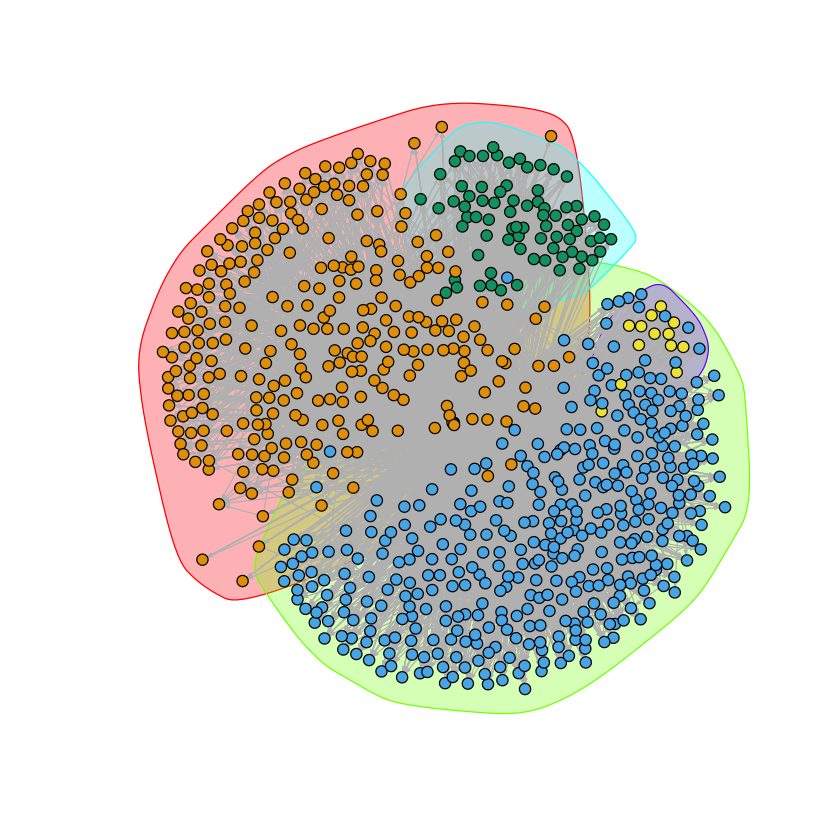

[1] 0.1910903


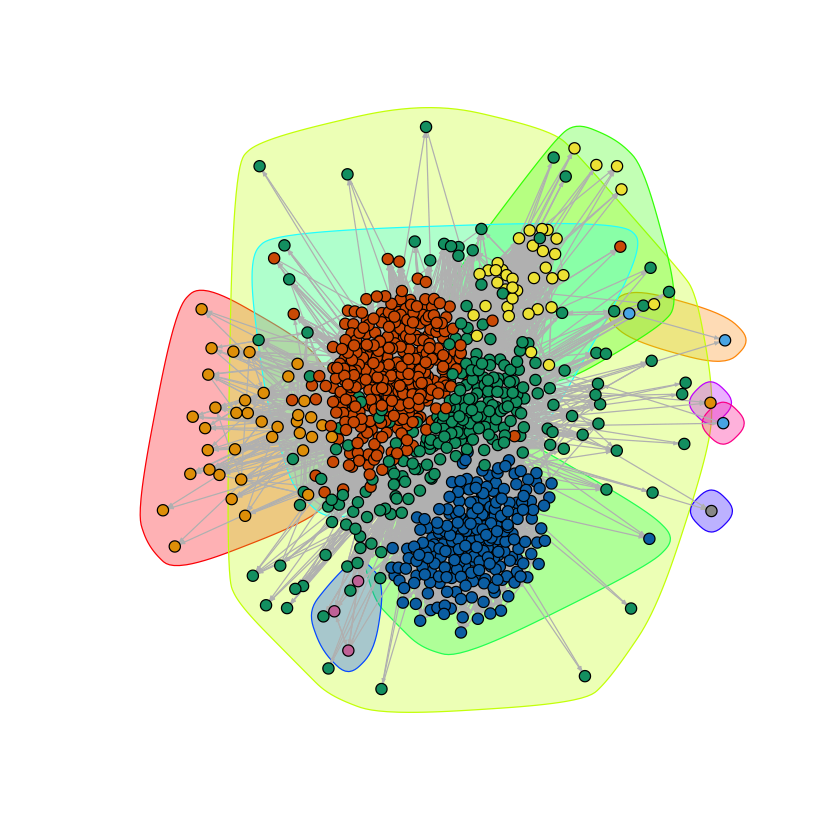

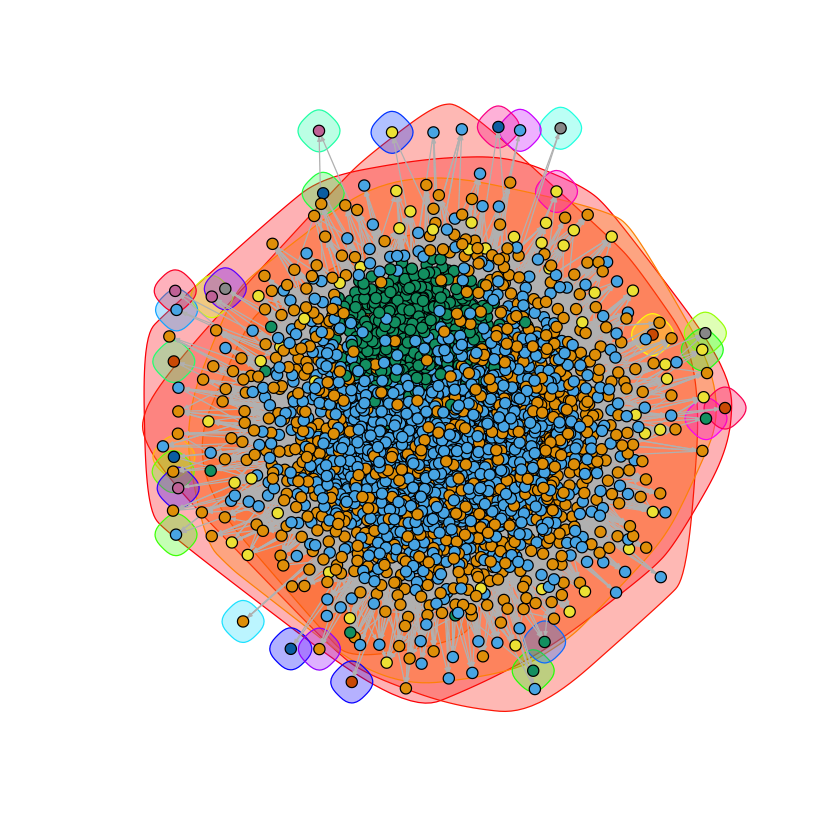

In [3]:
# Question 20
for (i in 1:length(id)){
    edgeFile <- paste('gplus/', id[i], '.edges', sep = '')
    g <- read.graph(edgeFile, format = 'ncol', directed = TRUE)
    g <- add.vertices(g, nv = 1, name = id[i])
    
    add_edge_list <- c()
    for (vertex in 1:(vcount(g)-1)){
        add_edge_list <- c(add_edge_list, c(vcount(g), vertex))
    }
    g <- add_edges(g, add_edge_list)
    
    
    walktrap_ <- walktrap.community(g)
    walktrap_modularity <- modularity(walktrap_)
    print(walktrap_modularity)

#     node_size <- vcount(g)
    
    plot(walktrap_, g, vertex.size = 4, vertex.label = NA, edge.color = 'grey', edge.arrow.size=0.2)
}

In [45]:
# Question 22
library('entropy')

ids <- c('109327480479767108490', '115625564993990145546', '101373961279443806744')
# ids <- c('109327480479767108490')
for (id in 1:length(ids)) {
  
    edges_file = paste("gplus/" , ids[id]  , ".edges" , sep="") # edge list
    circles_file = paste("gplus/" , ids[id] , ".circles" , sep="") # circles list

    circles_connect = file(circles_file , open="r")
    circles_content = readLines(circles_connect)
    circles = list()
    for (i in 1:length(circles_content)) {
        circle_nodes = strsplit(circles_content[i],"\t")
        circles = c(circles, list(circle_nodes[[1]][-1]))
    #     print(list(circle_nodes[[1]][-1]))
    }
    
    edgeFile <- paste('gplus/', ids[id], '.edges', sep = '')
    g <- read.graph(edgeFile, format = 'ncol', directed = TRUE)
    g <- add.vertices(g, nv = 1, name = ids[id])

    add_edge_list <- c()
    for (vertex in 1:(vcount(g)-1)){
        add_edge_list <- c(add_edge_list, c(vcount(g), vertex))
    }
    g <- add_edges(g, add_edge_list)

    walktrap_ <- walktrap.community(g)
    

    
    
    all_people_with_circle <- c()
    for (i in 1:length(circles)){
        all_people_with_circle <- c(all_people_with_circle, circles[[i]])
    }
    N <- length(unique(all_people_with_circle))

    
    
    H_C <- 0
    for (i in 1:length(circles)){
        a_i <- length(circles[[i]])
        H_C <- H_C + a_i/N*log(a_i/N+1e-8)
    }
    H_C <- (-H_C)

    
    
    H_K <- 0
    for (i in 1:length(walktrap_$membership)){
        b_i <- length(intersect(V(g)$name[which(walktrap_$membership == i)], all_people_with_circle))
        
        H_K <- H_K + b_i/N*log(b_i/N+1e-8)
    }
    H_K <- (-H_K)

    
    
    H_CK <- 0
    for (j in 1:length(walktrap_$membership)){
        b_j <- length(intersect(V(g)$name[which(walktrap_$membership == j)], all_people_with_circle))

        for (i in 1:length(circles)){
            C_ji <- length(intersect(V(g)$name[which(walktrap_$membership == j)], circles[[i]]))
            if (b_j > 0){
                H_CK <- H_CK + C_ji/N * log(C_ji/b_j+1e-8)
            }  
        }
    }
    H_CK <- (-H_CK)

    
    H_KC <- 0
    for (i in 1:length(circles)){
        a_i <- length(circles[[i]])
        for (j in 1:length(walktrap_$membership)){
            C_ji <- length(intersect(V(g)$name[which(walktrap_$membership == j)], circles[[i]]))
            if (a_i > 0){
                H_KC <- H_KC + C_ji/N * log(C_ji/a_i+1e-8) 
            } 
        }
    }
    H_KC <- (-H_KC)
    
        
    
    

    # homogeneity
    h <- 1 - H_CK/H_C
    # completeness
    c <- 1 - H_KC/H_K
    
    print(paste('node is ', ids[id], ', h = ', h, ', c = ', c))
    
}
  

[1] "node is  109327480479767108490 , h =  0.851885138504281 , c =  0.329873929645129"
[1] "node is  115625564993990145546 , h =  0.451890313760341 , c =  -3.42396232088498"
[1] "node is  101373961279443806744 , h =  0.00386670728313998 , c =  -1.50423838312832"
